In [1]:
# Check for GPU
!nvidia-smi -L


GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU (UUID: GPU-63841278-b94a-af1d-b385-7d84275529fb)


In [2]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   09_SkimLit_nlp_milestone_project_2.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	02. Neural Network Classification with TensorFlow.ipynb
	03. Convolutional Neural Networks and Computer Vision with TensorFlow.ipynb
	04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb
	05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb
	"06. Transfer Learning with TensorFlow Part 3 Scaling up (\360\237\215\224\360\237\221\201 Food Vision mini).ipynb"
	06_101_food_class_10_percent_saved_big_dog_model.zip
	06_101_food_class_10_percent_saved_big_dog_model.zip.1
	06_101_food_class_10_percent_saved_big_dog_model/
	07_efficientnetb0_feature_extract_model_mixed_precision.zip
	07_effici

In [3]:
! git clone https://github.com/Semen-B/NLP-Neural-Networks-for-Joint-Sentence-Classification-in-Medical-Paper-Abstracts.git

fatal: destination path 'NLP-Neural-Networks-for-Joint-Sentence-Classification-in-Medical-Paper-Abstracts' already exists and is not an empty directory.


In [4]:
! git add 09_SkimLit_nlp_milestone_project_2.ipynb

The file will have its original line endings in your working directory


In [5]:
! git commit -m "sixth commit"

[master e0b5b2a] sixth commit
 1 file changed, 518 insertions(+), 88 deletions(-)


In [6]:
! git remote add origin https://github.com/Semen-B/NLP_Medical_Paper_Abstracts.git

error: remote origin already exists.


In [7]:
! git branch -M master

In [8]:
! git branch

* master
  tmp


In [9]:
! git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.


To https://github.com/Semen-B/NLP_Medical_Paper_Abstracts.git
   617c94c..e0b5b2a  master -> master


In [10]:
! git reset

In [11]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.


In [12]:
!dir pubmed-rct

 Volume in drive C has no label.
 Volume Serial Number is AA66-8B4D

 Directory of C:\Users\semen\Desktop\pythonProject\pubmed-rct

01.05.2022  17:05    <DIR>          .
01.05.2022  17:05    <DIR>          ..
01.05.2022  17:14    <DIR>          PubMed_200k_RCT
01.05.2022  17:16    <DIR>          PubMed_200k_RCT_numbers_replaced_with_at_sign
01.05.2022  17:05    <DIR>          PubMed_20k_RCT
01.05.2022  17:05    <DIR>          PubMed_20k_RCT_numbers_replaced_with_at_sign
01.05.2022  17:05             2ÿ403 README.md
               1 File(s)          2ÿ403 bytes
               6 Dir(s)  308ÿ581ÿ752ÿ832 bytes free


In [13]:
# Check what files are in the PubMed_20K dataset 
!dir pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign

 Volume in drive C has no label.
 Volume Serial Number is AA66-8B4D

 Directory of C:\Users\semen\Desktop\pythonProject\pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign

01.05.2022  17:05    <DIR>          .
01.05.2022  17:05    <DIR>          ..
01.05.2022  17:05         4ÿ880ÿ409 dev.txt
01.05.2022  17:05         4ÿ846ÿ504 test.txt
01.05.2022  17:05        29ÿ118ÿ832 train.txt
               3 File(s)     38ÿ845ÿ745 bytes
               2 Dir(s)  308ÿ581ÿ752ÿ832 bytes free


In [14]:
# Create function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [15]:
def create_list_of_dic(filename):
    my_list_dic=[]
    my_list = str(get_lines(filename))
    sample = my_list.split('###')
    for f in range(len(sample)):
        count = 0
        separator = "\\n"
        semple_1 = sample[f].split(separator)
        total_lines = len(semple_1)-4
        for i in semple_1[1:-2]:
            temp_dic = {}
            _key, value, *other = i.split('\\t')
            temp_dic['target'] = ''.join(char for char in _key if char.isalnum())
            temp_dic['text'] = value.lower()
            temp_dic['line_number'] = count
            temp_dic['total_lines'] = total_lines
            my_list_dic.append(temp_dic)
            count+=1
    return my_list_dic

In [16]:
my_dic = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
my_dic[:50]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [17]:
len(my_dic)

180040

In [18]:
! git add 09_SkimLit_nlp_milestone_project_2.ipynb

In [19]:
!git commit -m "new commit accuracy"

On branch master
Your branch is up to date with 'origin/master'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	02. Neural Network Classification with TensorFlow.ipynb
	03. Convolutional Neural Networks and Computer Vision with TensorFlow.ipynb
	04_transfer_learning_in_tensorflow_part_1_feature_extraction.ipynb
	05_transfer_learning_in_tensorflow_part_2_fine_tuning.ipynb
	"06. Transfer Learning with TensorFlow Part 3 Scaling up (\360\237\215\224\360\237\221\201 Food Vision mini).ipynb"
	06_101_food_class_10_percent_saved_big_dog_model.zip
	06_101_food_class_10_percent_saved_big_dog_model.zip.1
	06_101_food_class_10_percent_saved_big_dog_model/
	07_efficientnetb0_feature_extract_model_mixed_precision.zip
	07_efficientnetb0_feature_extract_model_mixed_precision/
	07_food_vision_milestone_project_1.ipynb
	08_introduction_to_nlp_in_tensorflow.ipynb
	101_classes_10_percent_data_model_checkpoint.data-00000-of-00001
	101_classes_10_per

In [20]:
def preprocess_text_with_line_numbers(filename):
    """Returns a list of dictionaries of abstract line data.

    Takes in filename, reads its contents and sorts through each line,
    extracting things like the target label, the text of the sentence,
    how many sentences are in the current abstract and what sentence number
    the target line is.

    Args:
      filename: a string of the target text file to read and extract line data
      from.

    Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
    """
    input_lines = get_lines(filename) # get all lines from filename
    abstract_lines = "" # create an empty abstract
    abstract_samples = [] # create an empty list of abstracts

    # Loop through each line in target file
    for line in input_lines:
        if line.startswith("###"): # check to see if line is an ID line
            abstract_id = line
            abstract_lines = "" # reset abstract string
        elif line.isspace(): # check to see if line is a new line
            abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

            # Iterate through each line in abstract and count them at the same time
            for abstract_line_number, abstract_line in enumerate(abstract_line_split):
                line_data = {} # create empty dict to store data from line
                target_text_split = abstract_line.split("\t") # split target label from text
                line_data["target"] = target_text_split[0] # get target label
                line_data["text"] = target_text_split[1].lower() # get target text and lower it
                line_data["line_number"] = abstract_line_number # what number line does the line appear in the abstract?
                line_data["total_lines"] = len(abstract_line_split) - 1 # how many total lines are in the abstract? (start from 0)
                abstract_samples.append(line_data) # add line data to abstract samples list

        else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
            abstract_lines += line

    return abstract_samples

In [21]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
train_samples = preprocess_text_with_line_numbers('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
val_samples = preprocess_text_with_line_numbers(data_dir + "dev.txt") # dev is another name for validation set
test_samples = preprocess_text_with_line_numbers(data_dir + "test.txt")


In [22]:
# Check the first abstract of our training data
train_samples[:100]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [23]:
len(train_samples)

180040

In [24]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [25]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

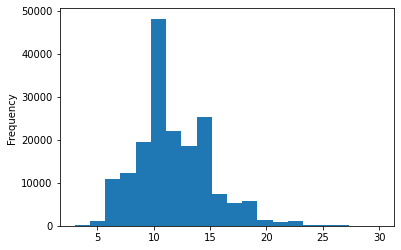

In [26]:
train_df.total_lines.plot(kind ="hist", bins=20)

In [27]:
train_samples = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt')
val_samples = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt')
test_samples = create_list_of_dic('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt')

In [28]:
import tensorflow as tf

In [29]:
#One hot encode lables
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(tf.expand_dims(val_df["target"].to_numpy(), axis=-1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1, 1))
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df["target"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [31]:
class_names = label_encoder.classes_
class_names

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

In [32]:
train_df 

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [33]:
from numpy import mean

In [34]:
list_of_num = []
for index in train_df.index:
    list_of_num.append(train_df['text'][index].count(' '))
    
avg = mean(list_of_num)
list_of_num, avg


([48,
  26,
  14,
  13,
  34,
  28,
  29,
  54,
  35,
  7,
  31,
  38,
  11,
  25,
  32,
  39,
  21,
  22,
  26,
  25,
  26,
  33,
  40,
  17,
  8,
  22,
  58,
  15,
  17,
  21,
  16,
  50,
  7,
  16,
  15,
  4,
  20,
  3,
  41,
  49,
  10,
  18,
  19,
  28,
  35,
  43,
  38,
  24,
  18,
  23,
  18,
  13,
  10,
  17,
  15,
  25,
  15,
  17,
  37,
  27,
  20,
  17,
  21,
  8,
  36,
  5,
  31,
  20,
  25,
  24,
  17,
  20,
  19,
  11,
  25,
  15,
  22,
  18,
  15,
  38,
  18,
  13,
  36,
  33,
  14,
  46,
  25,
  86,
  16,
  28,
  30,
  12,
  36,
  27,
  34,
  59,
  63,
  65,
  7,
  11,
  16,
  39,
  42,
  36,
  46,
  5,
  39,
  63,
  19,
  31,
  52,
  15,
  29,
  53,
  50,
  18,
  27,
  31,
  35,
  39,
  12,
  24,
  29,
  22,
  16,
  14,
  19,
  49,
  11,
  15,
  26,
  23,
  9,
  23,
  4,
  13,
  18,
  31,
  12,
  20,
  22,
  9,
  10,
  16,
  11,
  20,
  20,
  14,
  16,
  20,
  17,
  39,
  32,
  20,
  40,
  20,
  12,
  28,
  27,
  12,
  43,
  19,
  30,
  7,
  28,
  12,
  115,
  26,
  25

<AxesSubplot:ylabel='Frequency'>

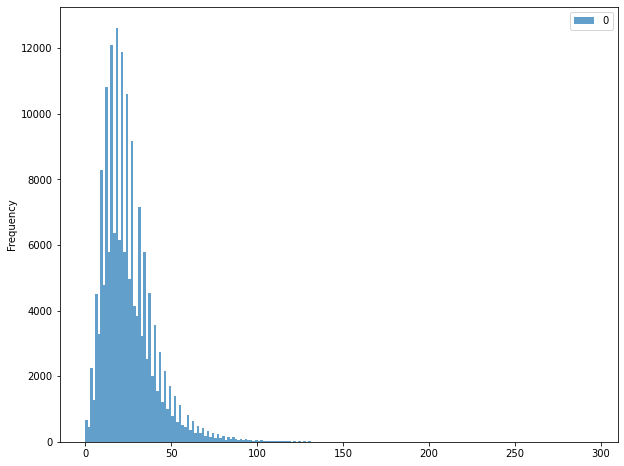

In [35]:
df_hist = pd.DataFrame(list_of_num)
df_hist.plot.hist(bins=200, alpha=0.7, figsize=(10, 8))

In [36]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
# Setup text vectorization with custom variables
max_vocab_length = 86000 # max number of words to have in our vocabulary
max_length = 60 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [37]:
text_vectorizer.adapt(train_df['text'])

In [38]:
text_vectorizer(train_df['text'][10000])

<tf.Tensor: shape=(60,), dtype=int64, numpy=
array([  299,    20,   784,  2628,    18,   457, 39644,     5,    71,
           4,  1046,   265,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0], dtype=int64)>

In [39]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 64841
Top 5 most common words: ['', '[UNK]', 'the', 'and', 'of']
Bottom 5 least common words: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [40]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             mask_zero=True,
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

In [41]:
sample_embed = embedding(text_vectorizer(train_df['text'][1]))


In [42]:
sample_embed.shape

TensorShape([60, 128])

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

In [44]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(5, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_conv')

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_1.summary()

Model: "model_1_conv"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 60)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 60, 128)           11008000  
                                                                 
 conv1d (Conv1D)             (None, 58, 32)            12320     
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                

In [45]:
# # Fit the model
# model_1_history = model_1.fit(train_df['text'],
#                               train_labels_one_hot,
#                               epochs=5,
#                               validation_data=(val_df['text'], val_labels_one_hot))

In [46]:
model_1.evaluate(test_df['text'], test_labels_one_hot)

942/942 [==============================] - 8s 4ms/step - loss: 1.6048 - accuracy: 0.3223


[1.604778528213501, 0.3223162293434143]

In [47]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

In [48]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [49]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [50]:
# tf.random.set_seed(42)

# inputs = layers.Input(shape=(1,), dtype='string')
# x = text_vectorizer(inputs)
# x = embedding(x)
# x = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(x)
# x = layers.GlobalAveragePooling1D()(x)
# outputs = layers.Dense(5, activation='softmax')(x)
# model_2 = tf.keras.Model(inputs, outputs, name='model_1_conv')

# model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# # Fit the model
# model_2_history = model_2.fit(train_dataset,
#                               steps_per_epoch=int(0.1*len(train_dataset)),
#                               epochs=5,
#                               validation_data=valid_dataset)

In [51]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

array([[0.19334473, 0.19870192, 0.19672765, 0.20254436, 0.20868137],
       [0.19361617, 0.19733591, 0.19706133, 0.20278572, 0.20920086],
       [0.19340661, 0.19871937, 0.19709343, 0.20236956, 0.20841102],
       ...,
       [0.1927978 , 0.19869478, 0.1978578 , 0.20150682, 0.20914282],
       [0.19374157, 0.19805434, 0.19790393, 0.20221913, 0.20808102],
       [0.19333579, 0.19709454, 0.19701387, 0.20325445, 0.20930135]],
      dtype=float32)

In [52]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([4, 4, 4, ..., 4, 4, 4], dtype=int64)>

In [53]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub

In [54]:
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False, 
                                        name="universal_sentence_encoder")

In [96]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embeding = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation='relu')(pretrained_embeding)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit feature extractor model for 3 epochs
model_3.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=5,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/5
562/562 [==============================] - 11s 19ms/step - loss: 0.9150 - accuracy: 0.6528 - val_loss: 0.7966 - val_accuracy: 0.6902
Epoch 2/5
562/562 [==============================] - 11s 19ms/step - loss: 0.7695 - accuracy: 0.7000 - val_loss: 0.7567 - val_accuracy: 0.6995
Epoch 3/5
562/562 [==============================] - 11s 20ms/step - loss: 0.7527 - accuracy: 0.7124 - val_loss: 0.7384 - val_accuracy: 0.7141
Epoch 4/5
562/562 [==============================] - 11s 20ms/step - loss: 0.7180 - accuracy: 0.7245 - val_loss: 0.7102 - val_accuracy: 0.7254
Epoch 5/5
562/562 [==============================] - 11s 20ms/step - loss: 0.7252 - accuracy: 0.7229 - val_loss: 0.6891 - val_accuracy: 0.7354


In [97]:
# Evaluate on whole validation dataset
model_3.evaluate(valid_dataset)

945/945 [==============================] - 15s 16ms/step - loss: 0.6966 - accuracy: 0.7356


[0.6966081857681274, 0.7356017231941223]

In [98]:
# Make predictions with feature extraction model
model_3_pred_probs = model_3.predict(valid_dataset)
model_3_pred_probs

array([[6.49415791e-01, 2.39053741e-01, 2.12838058e-03, 1.01627044e-01,
        7.77501659e-03],
       [4.80055004e-01, 4.18890506e-01, 5.88809839e-03, 9.27153900e-02,
        2.45095766e-03],
       [3.99896383e-01, 7.41308555e-02, 4.45812009e-02, 4.34596330e-01,
        4.67951447e-02],
       ...,
       [2.39678705e-03, 2.77167675e-03, 1.13435894e-01, 6.48777175e-04,
        8.80746841e-01],
       [2.73704389e-03, 2.24461090e-02, 4.95753437e-01, 1.10017124e-03,
        4.77963269e-01],
       [1.75888360e-01, 3.35141063e-01, 4.30946320e-01, 4.76684375e-03,
        5.32573871e-02]], dtype=float32)

In [99]:
# Convert the predictions with feature extraction model to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 2, 2], dtype=int64)>

In [60]:
from helper_functions import calculate_results

In [61]:
Calculate results from TF Hub pretrained embeddings results on validation set
model_3_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_3_preds)
model_3_results# 

In [62]:
import random
random_training_sentence = random.choice(train_sentences)

In [63]:
def split_chars(text):
    return " ".join(list(text))

In [64]:
# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

'c a n a g l i f l o z i n   @   a n d   @ m g   s i g n i f i c a n t l y   l o w e r e d   h a e m o g l o b i n   a @ c   (   h b a @ c   )   c o m p a r e d   w i t h   p l a c e b o   a t   w e e k   @   (   - @   %   ,   - @   %   a n d   - @   %   ;   p   <   @   )   ;   r e d u c t i o n s   w i t h   c a n a g l i f l o z i n   @   a n d   @ m g   w e r e   m a i n t a i n e d   a t   w e e k   @   (   - @   %   a n d   - @   %   )   .'

In [65]:

# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[10])

t h e   o u t c o m e   m e a s u r e s   i n   r h e u m a t o l o g y   c l i n i c a l   t r i a l s - o s t e o a r t h r i t i s   r e s e a r c h   s o c i e t y   i n t e r n a t i o n a l   r e s p o n d e r   r a t e   w a s   @   %   i n   t h e   i n t e r v e n t i o n   g r o u p   a n d   @   %   i n   t h e   p l a c e b o   g r o u p   (   p   <   @   )   .


In [66]:
import numpy as np
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

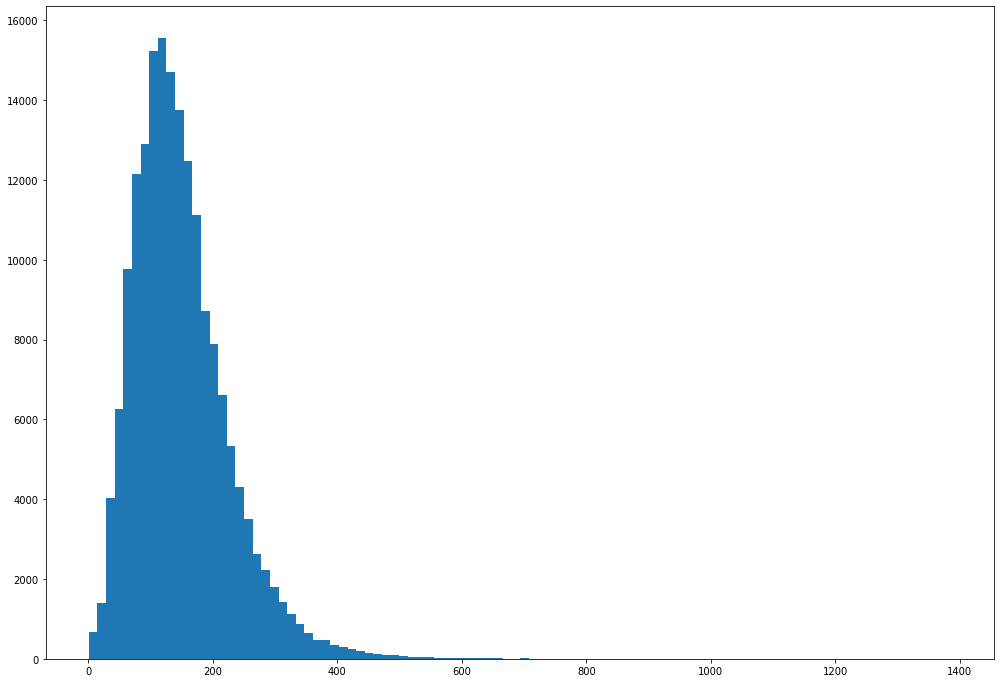

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 12))
plt.hist(char_lens, bins=100);

In [68]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [69]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
len(alphabet) + 2

70

In [71]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [72]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [73]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h i s   r a n d o m i s e d   c o n t r o l l e d   t r i a l   w i l l   e v a l u a t e   t h e   e f f e c t i v e n e s s   o f   a n   e d u c a t i o n   p r o g r a m   o n   k n o w l e d g e   ,   s e l f - c a r e   a n d   h e a l t h - r e l a t e d   q u a l i t y   o f   l i f e   o f   t h a i   h f   p a t i e n t s   a n d   t h e i r   c a r e r s   .

Length of chars: 159

Vectorized chars:
[[ 3 13  4  9  8  5  6 10  7 15  4  9  2 10 11  7  6  3  8  7 12 12  2 10
   3  8  4  5 12 20  4 12 12  2 21  5 12 16  5  3  2  3 13  2  2 17 17  2
  11  3  4 21  2  6  2  9  9  7 17  5  6  2 10 16 11  5  3  4  7  6 14  8
   7 18  8  5 15  7  6 23  6  7 20 12  2 10 18  2  9  2 12 17 11  5  8  2
   5  6 10 13  2  5 12  3 13  8  2 12  5  3  2 10 26 16  5 12  4  3 19  7
  17 12  4 17  2  7 17  3 13  5  4 13 17 14  5  3  4  2  6  3  9  5  6 10
   3 13  2  4  8 11  5  8  2  8  9  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [74]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")
# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t h i s   r a n d o m i s e d   c o n t r o l l e d   t r i a l   w i l l   e v a l u a t e   t h e   e f f e c t i v e n e s s   o f   a n   e d u c a t i o n   p r o g r a m   o n   k n o w l e d g e   ,   s e l f - c a r e   a n d   h e a l t h - r e l a t e d   q u a l i t y   o f   l i f e   o f   t h a i   h f   p a t i e n t s   a n d   t h e i r   c a r e r s   .

Embedded chars (after vectorization and embedding):
[[[ 0.02143646  0.0039435   0.00229018 ... -0.03322836  0.01596291
    0.03011217]
  [-0.00352365 -0.00013182  0.00372527 ...  0.03474713  0.01769248
    0.02855405]
  [-0.04667386  0.00679704 -0.02052331 ... -0.00730715  0.01182103
    0.01676439]
  ...
  [ 0.02413679  0.01285462 -0.04826153 ...  0.03818062 -0.04463496
   -0.00772554]
  [ 0.02413679  0.01285462 -0.04826153 ...  0.03818062 -0.04463496
   -0.00772554]
  [ 0.02413679  0.01285462 -0.04826153 ...  0.03818062 -0.04463496
   -0.00772554]]]

Character emb

In [75]:
sample_embed.shape

TensorShape([60, 128])

In [76]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [77]:
# Make Conv1D on chars only
inputs = layers.Input(shape=[], dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))

Epoch 1/3
562/562 [==============================] - 6s 8ms/step - loss: 1.2668 - accuracy: 0.4939 - val_loss: 1.0533 - val_accuracy: 0.5814
Epoch 2/3
562/562 [==============================] - 4s 8ms/step - loss: 1.0083 - accuracy: 0.5981 - val_loss: 0.9493 - val_accuracy: 0.6336
Epoch 3/3
562/562 [==============================] - 4s 8ms/step - loss: 0.9243 - accuracy: 0.6332 - val_loss: 0.8663 - val_accuracy: 0.6679


In [79]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8809 - accuracy: 0.6600


[0.8809260129928589, 0.6600026488304138]

In [81]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

array([[0.14982858, 0.46776727, 0.14236644, 0.14827968, 0.09175809],
       [0.4195322 , 0.29914498, 0.03389516, 0.20542221, 0.04200541],
       [0.09522373, 0.22414488, 0.19651662, 0.26008826, 0.22402655],
       ...,
       [0.00896675, 0.03759576, 0.11392954, 0.01233048, 0.8271775 ],
       [0.04158587, 0.1449798 , 0.34165722, 0.09115756, 0.3806196 ],
       [0.4289157 , 0.3815165 , 0.10666247, 0.070906  , 0.01199938]],
      dtype=float32)

In [82]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 0, 3, ..., 4, 4, 0], dtype=int64)>

In [83]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 66.00026479544552,
 'precision': 0.6522008790136358,
 'recall': 0.6600026479544552,
 'f1': 0.6498476488387553}

# Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In [88]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype='string', name='token input')
token_embeding=tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeding)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name='token_char_hybryd')([token_model.output,
                                                                  char_model.output])

# create output layers 
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation='relu')(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(5, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input], 
                        outputs=output_layer,
                        name="model_4_token_and_char_embeddings")

In [89]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 token input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

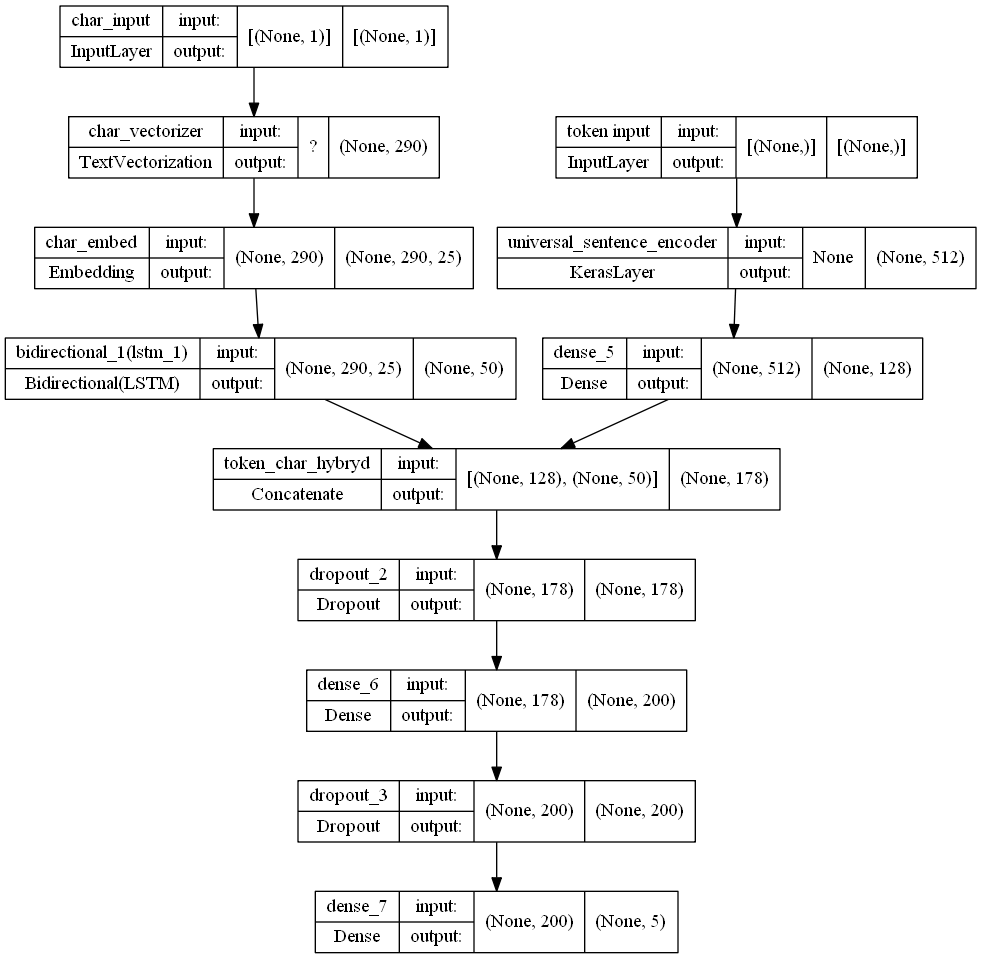

In [90]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

In [91]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [92]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [93]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [95]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=10,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/10
562/562 [==============================] - 25s 44ms/step - loss: 0.7428 - accuracy: 0.7174 - val_loss: 0.6710 - val_accuracy: 0.7473
Epoch 2/10
562/562 [==============================] - 25s 45ms/step - loss: 0.7159 - accuracy: 0.7250 - val_loss: 0.6565 - val_accuracy: 0.7530
Epoch 3/10
562/562 [==============================] - 25s 44ms/step - loss: 0.7108 - accuracy: 0.7298 - val_loss: 0.6534 - val_accuracy: 0.7540
Epoch 4/10
562/562 [==============================] - 25s 45ms/step - loss: 0.7078 - accuracy: 0.7315 - val_loss: 0.6387 - val_accuracy: 0.7600
Epoch 5/10
562/562 [==============================] - 25s 45ms/step - loss: 0.7221 - accuracy: 0.7275 - val_loss: 0.6305 - val_accuracy: 0.7650
Epoch 6/10
562/562 [==============================] - 26s 46ms/step - loss: 0.7203 - accuracy: 0.7251 - val_loss: 0.6235 - val_accuracy: 0.7660
Epoch 7/10
562/562 [==============================] - 26s 46ms/step - loss: 0.6914 - accuracy: 0.7374 - val_loss: 0.6245 - val_accuracy:

In [100]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 31s 32ms/step - loss: 0.6095 - accuracy: 0.7680


[0.6095377206802368, 0.7680060863494873]

In [101]:
train_df

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
...,...,...,...,...
180035,RESULTS,for the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"for pav , a significantly greater percentage o...",8,11
180037,RESULTS,both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"compared with standard statin monotherapy , th...",10,11


In [102]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

In [103]:
# How many different line numbers are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

In [107]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column 
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0